# Advertising Plot

Just a nice example plot with energy sums for different electron beam energies.

In [1]:
import hgc_testbeam as hgc
import matplotlib.pyplot as plt
import numpy as np

In [2]:
columns = ["event", "rechit_layer", "rechit_energy"]

In [3]:
runlist = hgc.runlist.query("Particle == 'electron'").groupby("Energy").apply(lambda x : x.iloc[0])

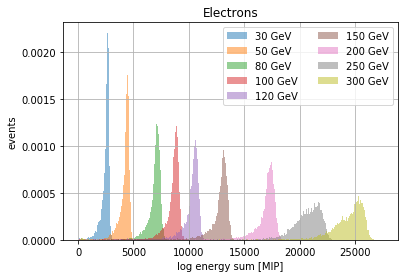

In [6]:
bins = np.linspace(1, 27500, 500)

for energy in runlist.index[1:]:
    row = runlist.loc[energy]
    df = hgc.load_run(row.Run, columns=columns)
    df.groupby("event")["rechit_energy"].sum().hist(bins=bins, alpha=0.5, label=f"{energy} GeV", density=True)

plt.title("Electrons")
plt.ylabel("events")
plt.xlabel("log energy sum [MIP]")
plt.legend(loc="upper right", ncol=2)
plt.show()

### Little icon plot

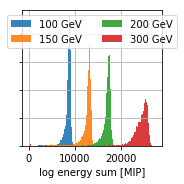

In [7]:
bins = np.linspace(1, 27500, 200)

plt.figure(figsize=(2.5,2.5))

for energy in runlist.index[1:]:
    if not energy in [20, 100, 150, 200, 300]:
        continue
    row = runlist.loc[energy]
    df = hgc.load_run(row.Run, columns=columns)
    df.groupby("event")["rechit_energy"].sum().hist(bins=bins, alpha=0.9, label=f"{energy} GeV", density=True)

plt.gca().tick_params(labelleft=False)
plt.xlabel("log energy sum [MIP]")
plt.legend(loc="upper center", ncol=2)
plt.show()